# SVM Lineal ...

$$\frac{1}{n}\sum_{i = 1}^n \max(0, 1 - y_i(Ax_i - b)) + \alpha ||A||^2$$

 - $A$: es el vector de las pendientes en cada variable
 - $b$: es la ordenada en el origen (intercept)
 - $ x = (x_1, x_2, \cdots, x_n)$: es el vector de datos
 - $y_i$: es la clase del objeto (-1 o 1)
 - $\alpha$: es el coeficiente de regularización y suavizado de la separación

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
iris = datasets.load_iris()
session = tf.Session()

In [143]:
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [144]:
train_idx = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace = False)
test_idx = np.array(list(set(range(len(x_vals))) - set(train_idx)))
x_vals_train = x_vals[train_idx]
y_vals_train = y_vals[train_idx]
x_vals_test = x_vals[test_idx]
y_vals_test = y_vals[test_idx]

In [145]:
batch_size = 30

x_data = tf.placeholder(shape = [None, 2], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [2, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [146]:
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [147]:
l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [148]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [149]:
my_optim = tf.train.GradientDescentOptimizer(0.005)
train_step = my_optim.minimize(loss)

In [150]:
init = tf.global_variables_initializer()
session.run(init)

In [151]:
loss_vect = []
train_acc = []
test_acc = []
for i in range(6000):
    rand_idx = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_idx]
    rand_y = np.transpose([y_vals_train[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    
    temp_loss = session.run(loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    
    train_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(train_acc_temp)
    
    test_acc_temp = session.run(accuracy, feed_dict = {x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(test_acc_temp)
    
    if (i + 1) % 50 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)) + ", Loss = " + str(temp_loss))

Paso # 50, A = [[-0.51807284]
 [ 0.47823346]], b = [[-1.4304123]], Loss = [0.81265646]
Paso # 100, A = [[-0.5002288]
 [ 0.3604426]], b = [[-1.4392458]], Loss = [0.6609885]
Paso # 150, A = [[-0.47371203]
 [ 0.25342727]], b = [[-1.4492458]], Loss = [0.42708004]
Paso # 200, A = [[-0.46073586]
 [ 0.1550984 ]], b = [[-1.4564123]], Loss = [0.70517457]
Paso # 250, A = [[-0.42904913]
 [ 0.0739471 ]], b = [[-1.4662458]], Loss = [0.4980789]
Paso # 300, A = [[-0.40215313]
 [-0.00789538]], b = [[-1.4755795]], Loss = [0.47532207]
Paso # 350, A = [[-0.3916643]
 [-0.0868948]], b = [[-1.4824132]], Loss = [0.47897574]
Paso # 400, A = [[-0.3624602 ]
 [-0.15993188]], b = [[-1.49408]], Loss = [0.6016379]
Paso # 450, A = [[-0.3552085 ]
 [-0.23349494]], b = [[-1.5014132]], Loss = [0.3168238]
Paso # 500, A = [[-0.34070307]
 [-0.2922442 ]], b = [[-1.5102463]], Loss = [0.3809169]
Paso # 550, A = [[-0.32229498]
 [-0.35608172]], b = [[-1.520746]], Loss = [0.34430012]
Paso # 600, A = [[-0.30898353]
 [-0.41349542]

Paso # 4750, A = [[-0.21263555]
 [-1.3063635 ]], b = [[-2.2227373]], Loss = [0.30544013]
Paso # 4800, A = [[-0.2148023]
 [-1.3038877]], b = [[-2.2285702]], Loss = [0.30711016]
Paso # 4850, A = [[-0.21951537]
 [-1.3025161 ]], b = [[-2.2339034]], Loss = [0.2703201]
Paso # 4900, A = [[-0.21044092]
 [-1.301032  ]], b = [[-2.2419026]], Loss = [0.3284044]
Paso # 4950, A = [[-0.20776647]
 [-1.3021983 ]], b = [[-2.2489023]], Loss = [0.28372237]
Paso # 5000, A = [[-0.22768971]
 [-1.3063267 ]], b = [[-2.2517352]], Loss = [0.27021682]
Paso # 5050, A = [[-0.21287227]
 [-1.3021014 ]], b = [[-2.260735]], Loss = [0.3133875]
Paso # 5100, A = [[-0.22978762]
 [-1.3025892 ]], b = [[-2.2632349]], Loss = [0.2802318]
Paso # 5150, A = [[-0.21552335]
 [-1.3007021 ]], b = [[-2.2717345]], Loss = [0.33684793]
Paso # 5200, A = [[-0.21767387]
 [-1.3001622 ]], b = [[-2.276901]], Loss = [0.36828637]
Paso # 5250, A = [[-0.2112497]
 [-1.2974653]], b = [[-2.2839007]], Loss = [0.32086256]
Paso # 5300, A = [[-0.21932922]

In [152]:
[[a1], [a2]] = session.run(A)
[[b]] = session.run(b)

slope = -a2 / a1
y_intercept = b / a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope * i + y_intercept)
    
setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
no_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
no_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

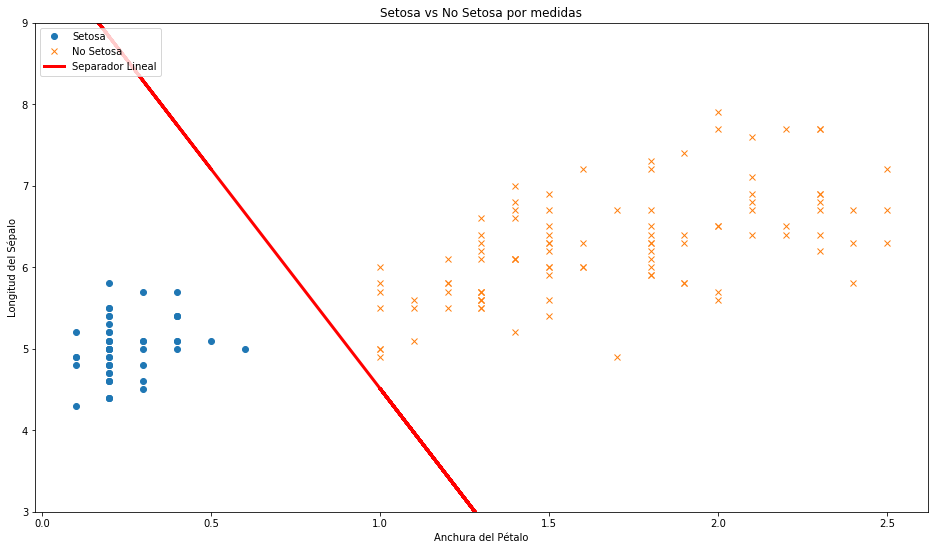

In [153]:
plt.figure(figsize = (16, 9))
plt.plot(setosa_x, setosa_y, "o", label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, "x", label = "No Setosa")
plt.plot(x1_vals, best_fit, "r-", label = "Separador Lineal", linewidth = 3)
plt.legend(loc = "upper left")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.title("Setosa vs No Setosa por medidas")
plt.ylim([3, 9])
plt.show()

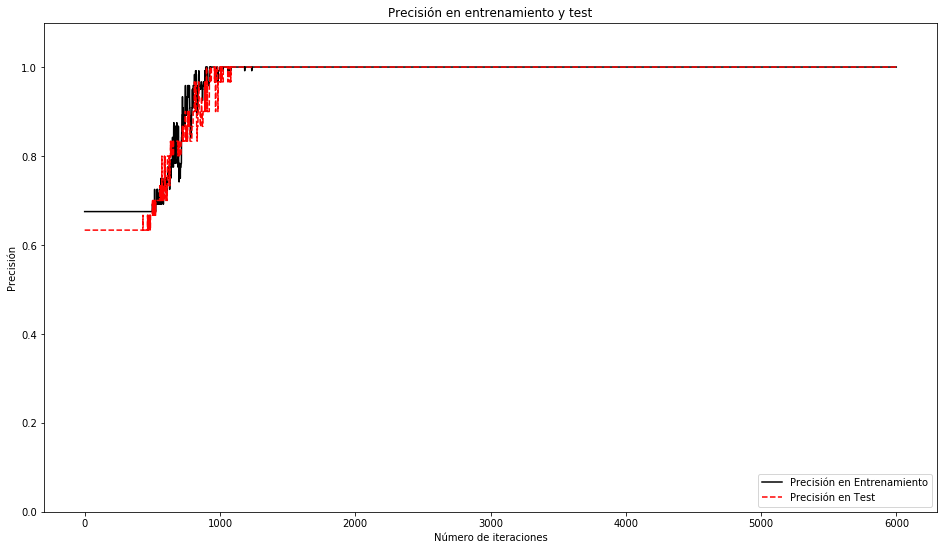

In [154]:
plt.figure(figsize = (16, 9))
plt.plot(train_acc, "k-", label = "Precisión en Entrenamiento")
plt.plot(test_acc, "r--", label = "Precisión en Test")
plt.xlabel("Número de iteraciones")
plt.title("Precisión en entrenamiento y test")
plt.ylabel("Precisión")
plt.legend(loc = "lower right")
plt.ylim([0, 1.1])
plt.show()

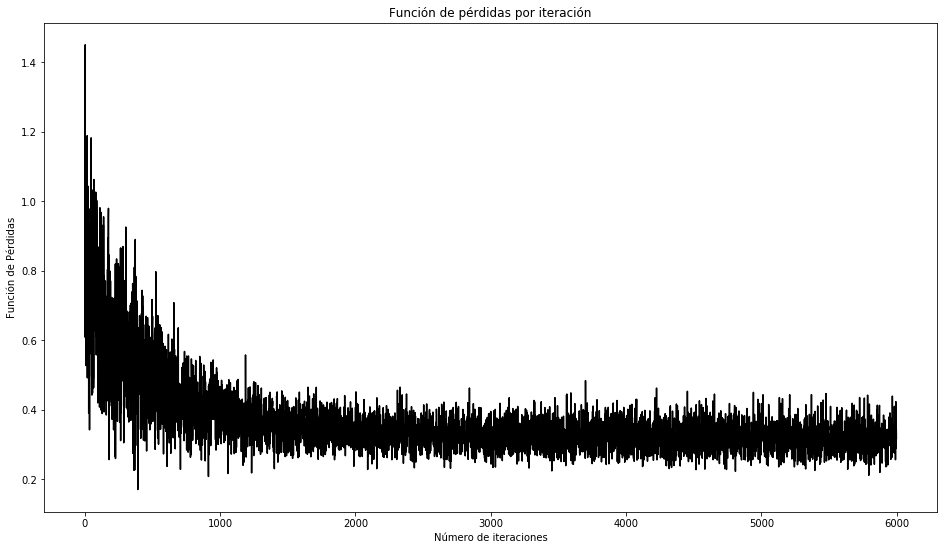

In [155]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-")
plt.title("Función de pérdidas por iteración")
plt.xlabel("Número de iteraciones")
plt.ylabel("Función de Pérdidas")
plt.show()